In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

# Load and preprocess data
df = pd.read_excel('D:\\OLAP\\Coffee Data.xlsx')
df = df[['Order Date', 'Amount']]
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='Order Date')
df = df.groupby('Order Date')['Amount'].sum().reset_index()
df = df.set_index('Order Date')

# Feature Engineering - Create numerical representation of date
df['Days'] = (df.index - df.index.min()).days

X = df['Days'].values.reshape(-1, 1)  # Reshape for sklearn
y = df['Amount'].values

In [2]:
# Correct Time Series Splitting
train_size = int(len(df) * 0.7)  # 70% for training
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

train_dates = df.index[0:train_size]
test_dates = df.index[train_size:len(X)]

In [3]:
# Polynomial Regression - Adding polynomial features can improve time series models
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [4]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [25]:
# Predict on test set
y_pred_test = model.predict(X_test_poly)

# Future prediction setup (365 days into the future)
future_dates = pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=365, freq='D')
future_days = (future_dates - df.index.min()).days.values.reshape(-1, 1)
future_days_poly = poly.transform(future_days)
future_predictions = model.predict(future_days_poly)


DatetimeIndex(['2022-08-20', '2022-08-21', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27',
               '2022-08-28', '2022-08-29',
               ...
               '2023-08-10', '2023-08-11', '2023-08-12', '2023-08-13',
               '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17',
               '2023-08-18', '2023-08-19'],
              dtype='datetime64[ns]', length=365, freq='D')

In [6]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test[y_test != 0])) * 100
   
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 3943.9119564060948
Root Mean Squared Error (RMSE): 62.80057289870925
Mean Absolute Error (MAE): 45.33753244418797
Mean Absolute Percentage Error (MAPE): 132.22864858842092


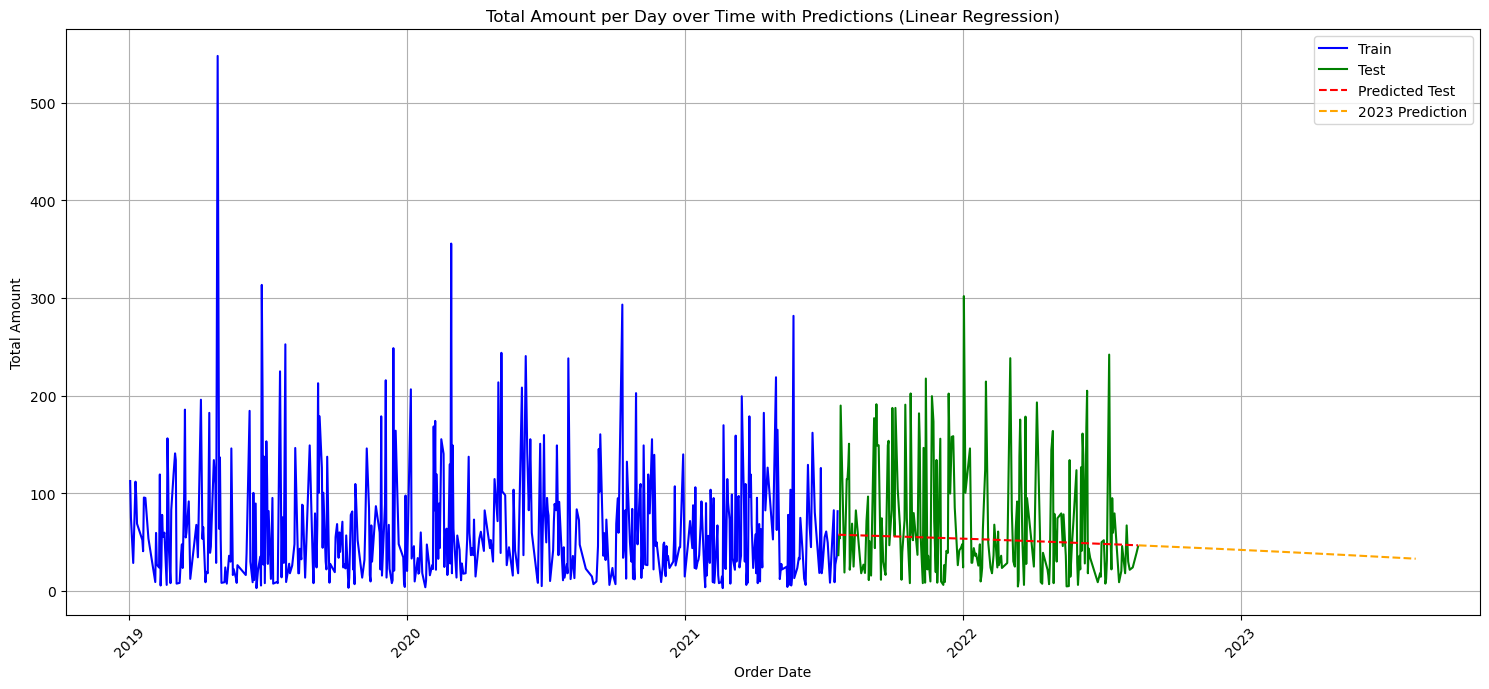

In [7]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(train_dates, y_train, label='Train', color='blue')
plt.plot(test_dates, y_test, label='Test', color='green')
plt.plot(test_dates, y_pred_test, label='Predicted Test', color='red', linestyle='--')
plt.plot(future_dates, future_predictions, label='2023 Prediction', color='orange', linestyle='--')
plt.xlabel('Order Date')
plt.ylabel('Total Amount')
plt.title('Total Amount per Day over Time with Predictions (Linear Regression)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()